In [8]:
import pandas as pd
from io import StringIO

# Le mode
## Mode simple

In [85]:
s = pd.Series([90,95,90,95,85,75,90,100,80,75])
s.mode()

0    90
dtype: int64

In [87]:
s.value_counts()

90     3
95     2
75     2
85     1
100    1
80     1
dtype: int64

## Multimodal

In [88]:
s = pd.Series([100,95,90,95,85,75,90,100,80,75])
s.mode()

0     75
1     90
2     95
3    100
dtype: int64

In [95]:
s.value_counts()

95     2
75     2
90     2
100    2
85     1
80     1
dtype: int64

## Variable quantitative continue

In [46]:
df = pd.read_csv(StringIO("""age,x,n,a
0-19 ans,0,14115,20
20-29 ans,20,7403,10
30-39 ans,30,7842,10
40-49 ans,40,7967,10
50-59 ans,50,8281,10
60-69 ans,60,7716,10
70-79 ans,70,5521,10
80-89 ans,80,3074,10
90-99 ans,90,878,10
"""))

In [57]:
df["d"] = df.n / df.a # calcule de la densité

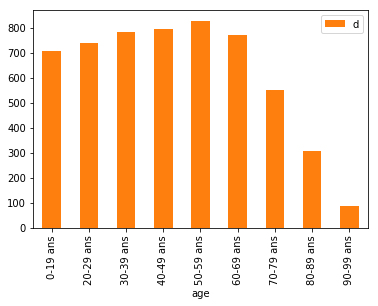

In [58]:
df.plot(kind = "bar", x = "age", y = "d",  color=['tab:orange',]*12)

In [53]:
h = df.d.max() # Hauteur de la classe modal
x1 = df.x[df.d.idxmax()] # début de la classe modal
x2 = df.x[df.d.idxmax() + 1] # fin de la classe modal
h1 = df.d[df.d.idxmax() - 1] # hauteur de la classe précédent la classe modal
h2 = df.d[df.d.idxmax() + 1] # hauteur de la classe suivant la classe modal
h, x1, x2, h1, h2

(828.1, 50, 60, 796.7, 771.6)

In [66]:
k1 = (h - h1) # Différence entre les hauteures à gauche
k2 = (h - h2) # Différence entre les hauteures à droite
Mo = ((k2 * x1) + (k1 * x2))/(k1 + k2) # Mode comme moyenne pondérée de x1 et x2
k1, k2, Mo

(31.399999999999977, 56.5, 53.57224118316268)

In [72]:
# formule alternative qui montre le déplacement vers x1 si k1 < k2
Mo2 = x1 + k1 / (k1 + k2) * (x2 - x1)
Mo, Mo2

(53.57224118316268, 53.57224118316268)

# Les moyennes

# Les quantiles